# Prediction using Unsupervised ML
### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.
work to make more profit.
Link for the data - https://bit.ly/3i4rbWl

### Subhasish Pramanik
### Data Sience & Business Analytics
### GRIP @ The Sparks Foundation

## Importing Libraries

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use("ggplot")
plt.rcParams["figure.figsize"]=[14,8]
import warnings
warnings.filterwarnings('ignore')

## Uploading the data from the source

In [103]:
data = pd.read_csv("SampleSuperstore.csv")
print("Data taken successfully")

Data taken successfully


## Checking various attributes of the Dataset

In [104]:
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [105]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [106]:
data.shape

(9994, 13)

In [107]:
data.duplicated().sum()

17

In [108]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [109]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [110]:
data.describe().style.background_gradient(cmap="coolwarm_r")

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Checking for null values in cells

In [112]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [113]:
data.notnull().sum()

Ship Mode       9994
Segment         9994
Country         9994
City            9994
State           9994
Postal Code     9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

In [114]:
data['Postal Code']=data['Postal Code'].astype('object')

In [115]:
data.drop_duplicates(subset=None, keep='first', inplace=True)
data.duplicated().sum()

0

## Checking for Correlation between them

<AxesSubplot:>

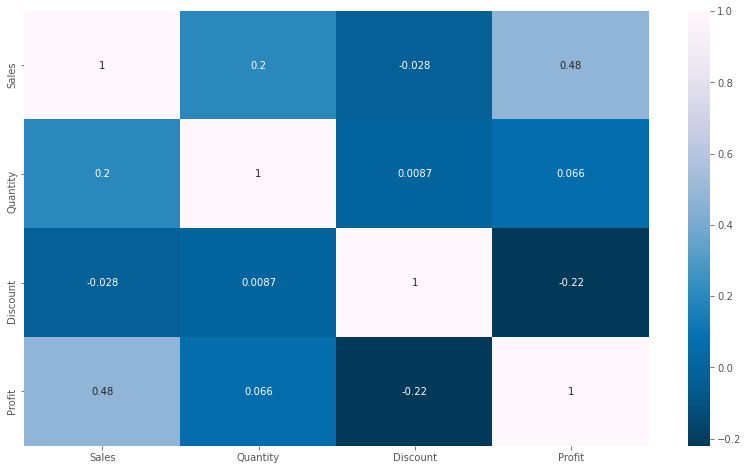

In [116]:
correlation=data.corr()
sns.heatmap(correlation, annot=True, cmap='PuBu_r')

## Analyzing Ship Mode

In [117]:
data=data.drop(['Postal Code'], axis=1)

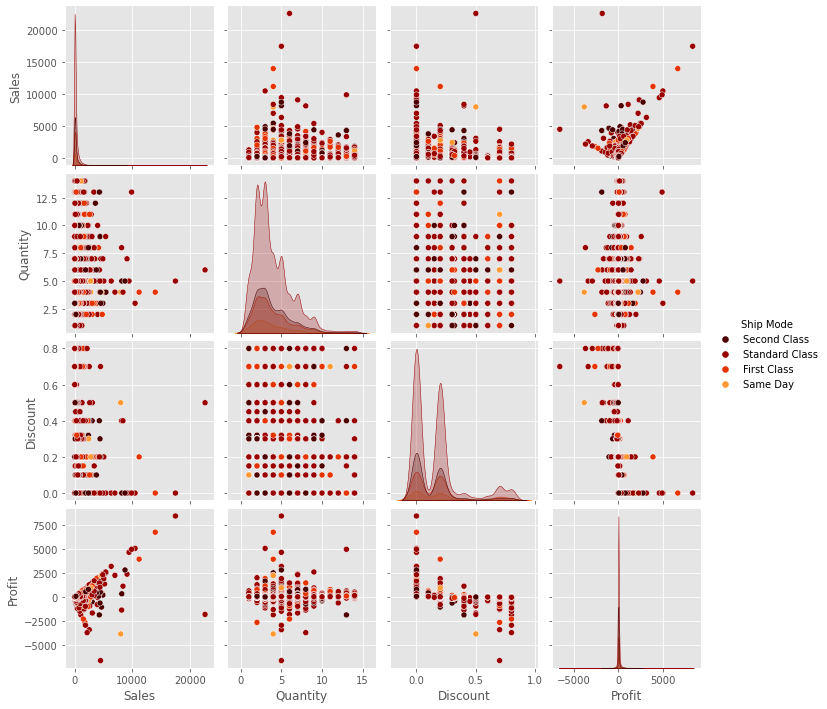

In [118]:
sns.pairplot(data, hue='Ship Mode', palette='gist_heat')

In [119]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [120]:
data_second=data[data["Ship Mode"]=="Second Class"]
data_standard=data[data["Ship Mode"]=="Standard Class"]
data_first=data[data["Ship Mode"]=="First Class"]
data_same=data[data["Ship Mode"]=="Same Day"]

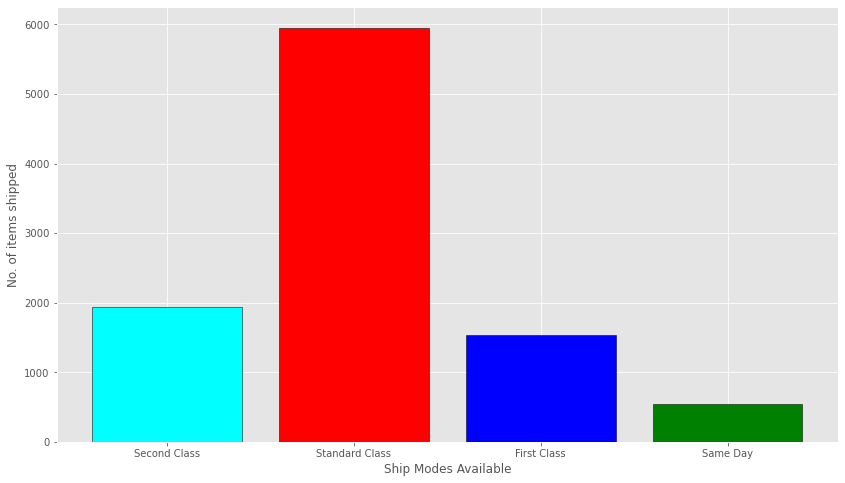

In [172]:
x=["Second Class", "Standard Class", "First Class", "Same Day"]
y=[len(data_second.index), len(data_standard.index), len(data_first.index), len(data_same.index)]
plt.bar(x, y, color=["cyan", "red", "blue", "green"], edgecolor="black")
plt.xlabel("Ship Modes Available")
plt.ylabel("No. of items shipped")
plt.grid(True)
plt.show()

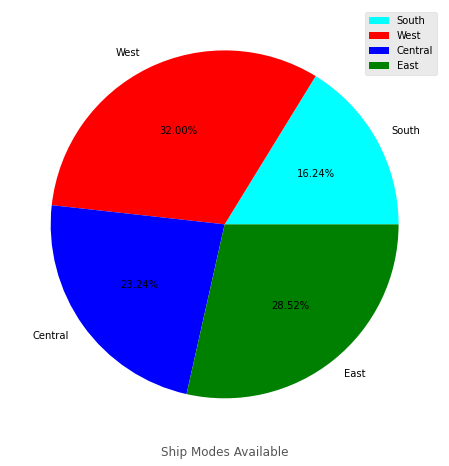

In [140]:
plt.pie(y, labels=x, colors=["cyan", "red", "blue", "green"], autopct="%1.2f%%")
plt.xlabel("Ship Modes Available")
plt.legend()
plt.grid(True)
plt.show()

In [124]:
data['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

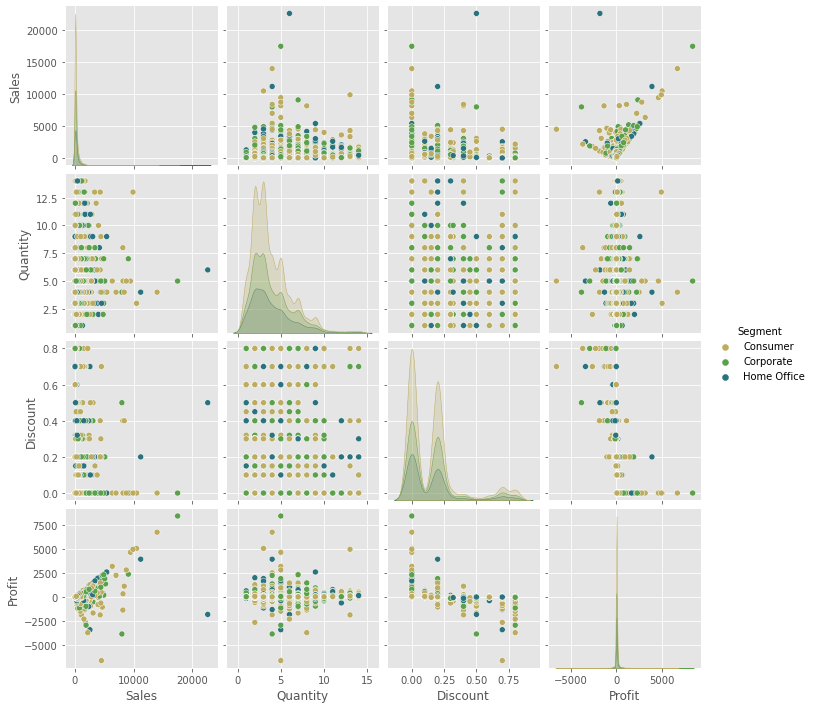

In [125]:
sns.pairplot(data, hue='Segment', palette='gist_earth_r')

## Analyzing types of Customers

In [126]:
data_con=data[data["Segment"]=="Consumer"]
data_corp=data[data["Segment"]=="Corporate"]
data_home=data[data["Segment"]=="Home Office"]

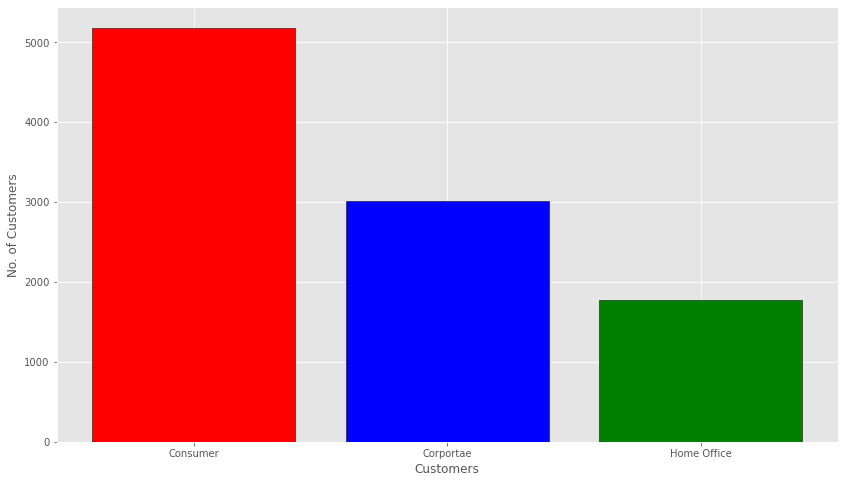

In [127]:
x=["Consumer", "Corportae", "Home Office"]
y=[len(data_con.index), len(data_corp.index), len(data_home.index)]
plt.bar(x, y, color=["red", "blue", "green"], edgecolor="black")
plt.title=("Types of Customers")
plt.xlabel("Customers")
plt.ylabel("No. of Customers")
plt.grid(True)
plt.show()

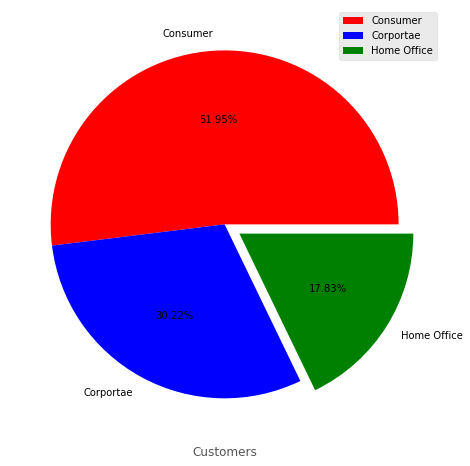

In [129]:
plt.pie(y, labels=x, colors=["red", "blue", "green"], autopct="%1.2f%%", explode=(0,0,0.1))
plt.xlabel("Customers")
plt.legend()
plt.grid(True)
plt.show()

## Analyzing Sales in States

In [130]:
data['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

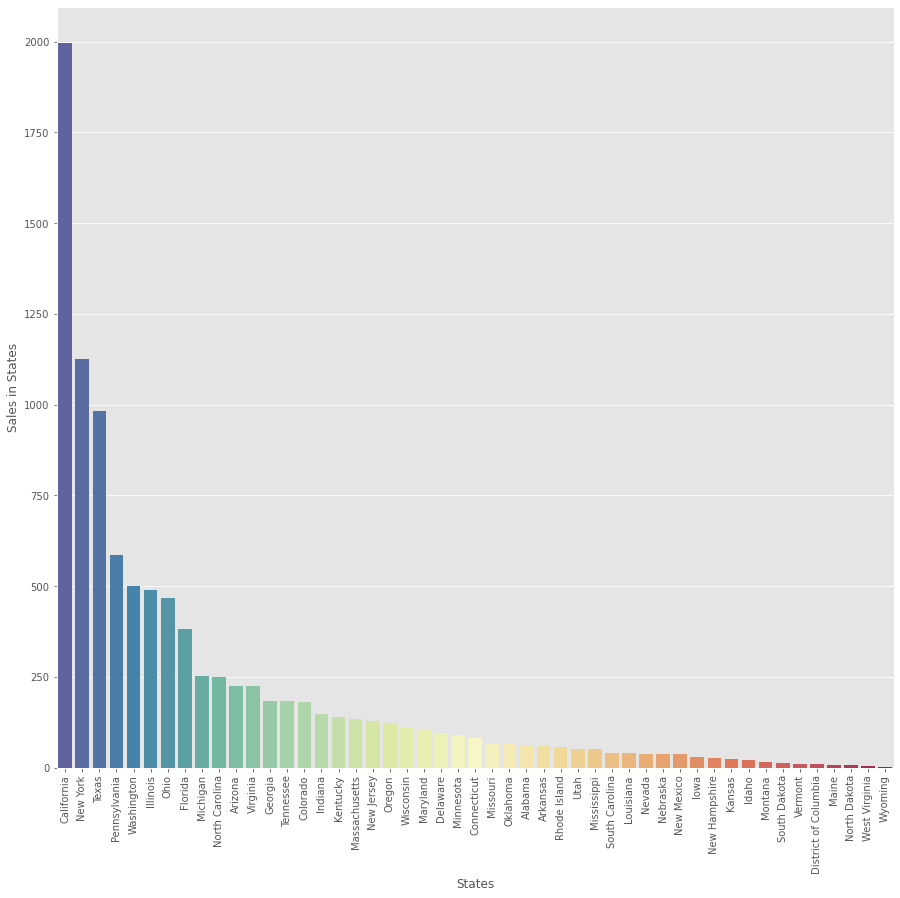

In [132]:
plt.figure(figsize=(15, 14))
sns.countplot(x='State', data=data, palette='Spectral_r', order=data['State'].value_counts().index)
plt.xlabel("States")
plt.ylabel("Sales in States")
plt.xticks(rotation=90)
plt.show()

## Analyzing the Regions served

In [133]:
data['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

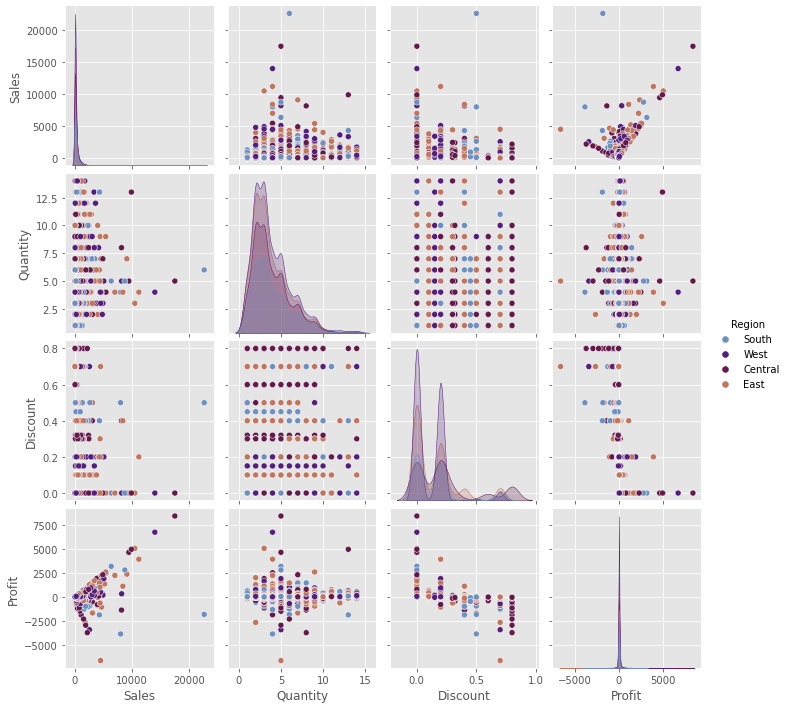

In [134]:
sns.pairplot(data, hue='Region', palette='twilight')

In [135]:
data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [136]:
data_south=data[data["Region"]=="South"]
data_west=data[data["Region"]=="West"]
data_central=data[data["Region"]=="Central"]
data_east=data[data["Region"]=="East"]

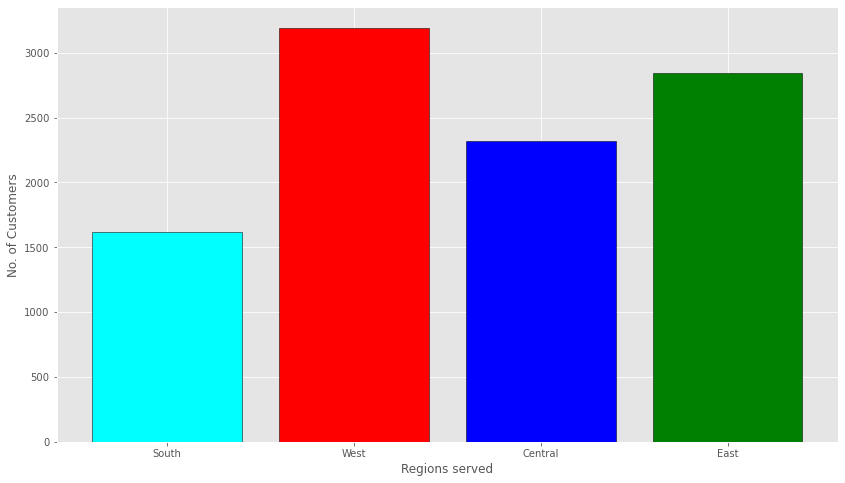

In [138]:
x=["South", "West", "Central", "East"]
y=[len(data_south.index), len(data_west.index), len(data_central.index), len(data_east.index)]
plt.bar(x, y, color=["cyan", "red", "blue", "green"], edgecolor="black")
plt.xlabel("Regions served")
plt.ylabel("No. of Customers")
plt.grid(True)
plt.show()

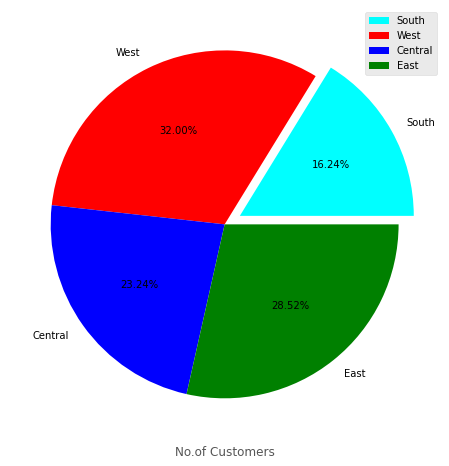

In [142]:
plt.pie(y, labels=x, colors=["cyan", "red", "blue", "green"], autopct="%1.2f%%", explode=(0.1,0,0,0))
plt.xlabel("No.of Customers")
plt.legend()
plt.grid(True)
plt.show()

## Analyzing Profits for different sections

In [143]:
mode_profit=data.groupby("Ship Mode")["Profit"].sum()
segment_profit=data.groupby("Segment")["Profit"].sum()
region_profit=data.groupby("Region")["Profit"].sum()
category_profit=data.groupby("Category")["Profit"].sum()

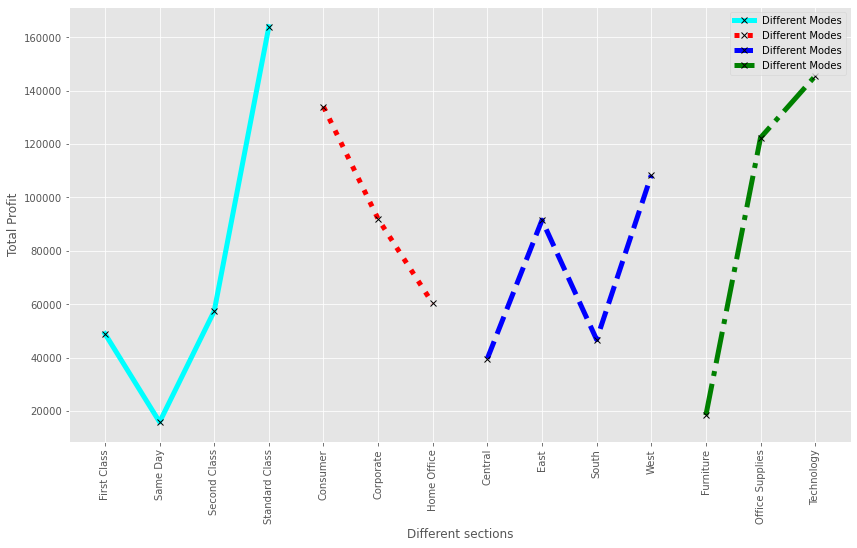

In [149]:
plt.plot(mode_profit, color="cyan", lw=5, ls="-", marker="x", label="Different Modes", markeredgecolor="black")
plt.plot(segment_profit, color="red", lw=5, ls=":", marker="x", label="Different Modes", markeredgecolor="black")
plt.plot(region_profit, color="blue", lw=5, ls="--", marker="x", label="Different Modes", markeredgecolor="black")
plt.plot(category_profit, color="green", lw=5, ls="-.", marker="x", label="Different Modes", markeredgecolor="black")
plt.xticks(rotation=90)
plt.xlabel("Different sections")
plt.ylabel("Total Profit")
plt.legend()
plt.grid(True)
plt.show()

## Analyzing Sub-Categories

In [150]:
data["Sub-Category"].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

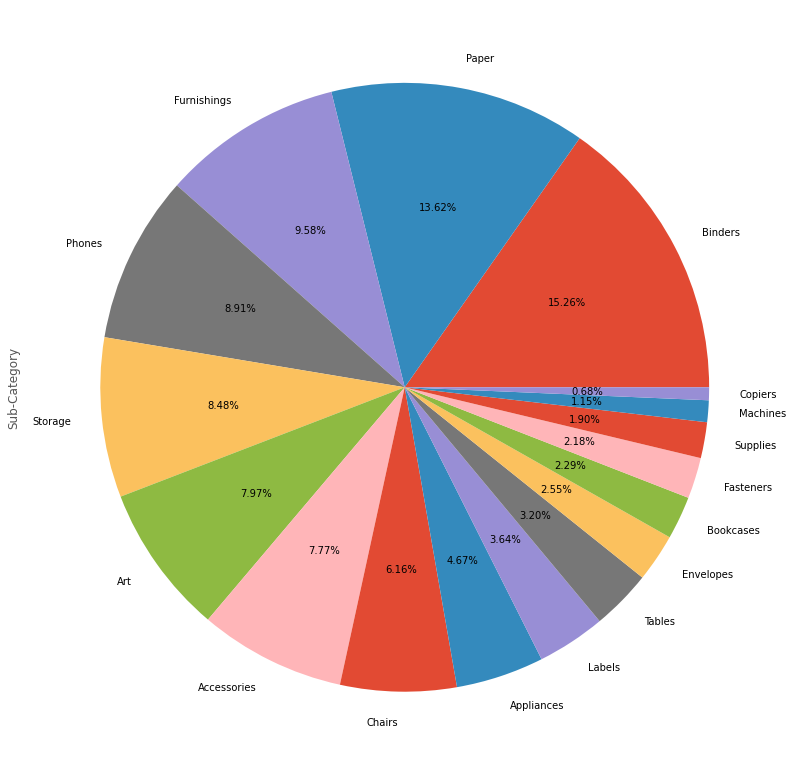

In [151]:
plt.figure(figsize=(15, 14))
data["Sub-Category"].value_counts().plot.pie(autopct="%1.2f%%")
plt.show()

## Analyzing Profits, Loss & Sales by States

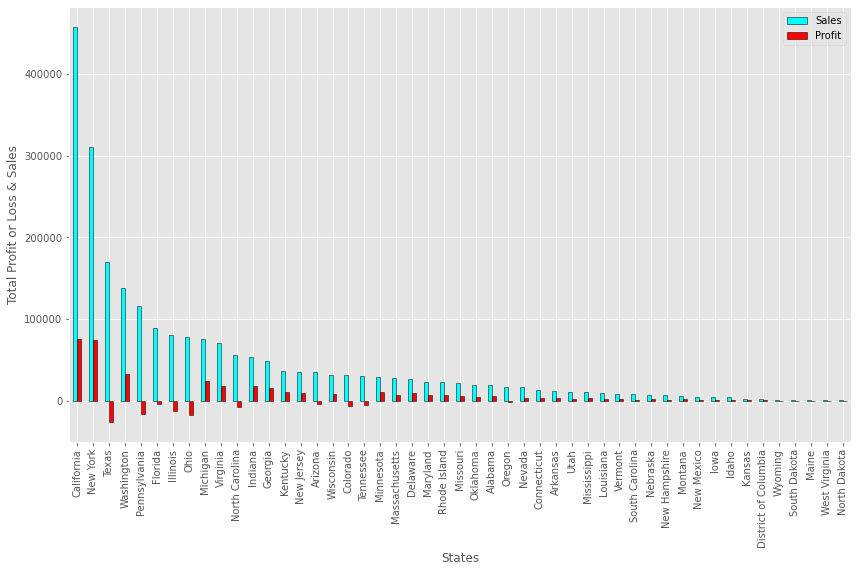

In [153]:
state_sal_pro=data.groupby("State")[["Sales","Profit"]].sum().sort_values(by="Sales", ascending=False)
state_sal_pro.plot(kind="bar", color=["cyan", "red"], edgecolor="black")
plt.xlabel("States")
plt.ylabel("Total Profit or Loss & Sales")
plt.grid(True)
plt.show()

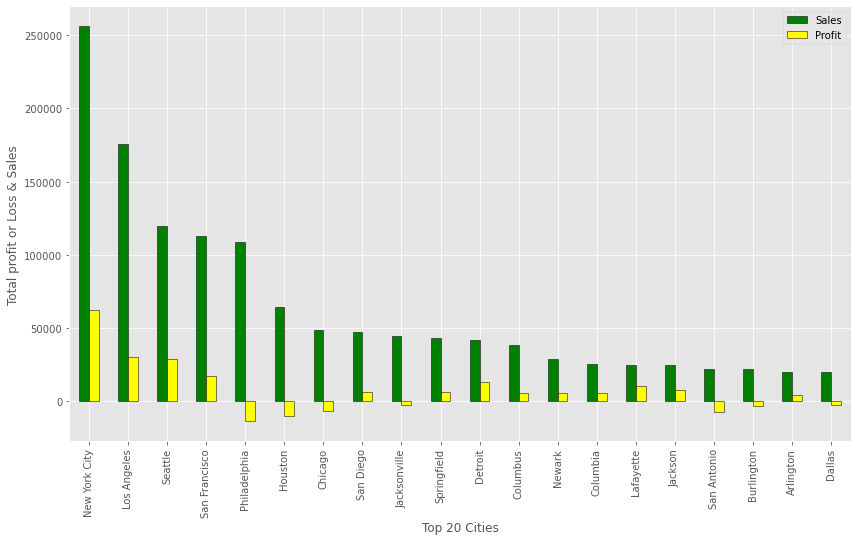

In [159]:
city_sal_pro=data.groupby("City")[["Sales", "Profit"]].sum().sort_values(by="Sales", ascending=False).head(20)
city_sal_pro.plot(kind="bar", color=["green", "yellow"], edgecolor="black")
plt.xlabel("Top 20 Cities")
plt.ylabel("Total profit or Loss & Sales")
plt.grid(True)
plt.show()

In [161]:
t_states=data['State'].value_counts().nlargest(10)
t_states

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

## Analyzing Profits, Loss & Sales by Category

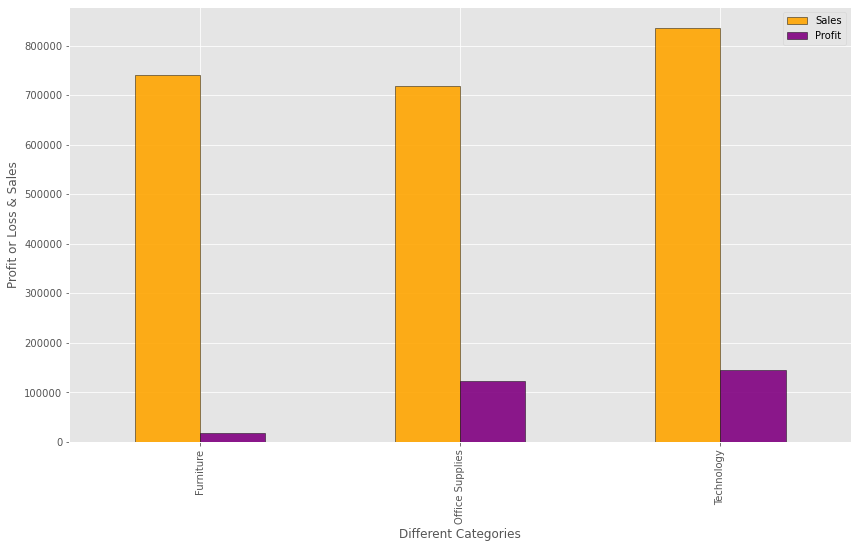

In [163]:
data.groupby("Category")[["Sales", "Profit"]].sum().plot.bar(color=["orange", "purple"], alpha=0.9, edgecolor="black")
plt.xlabel("Different Categories")
plt.ylabel("Profit or Loss & Sales")
plt.show()

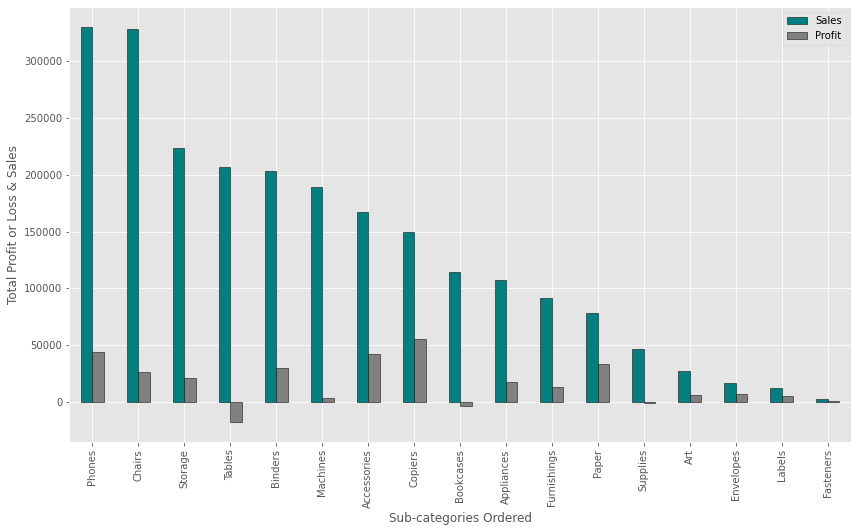

In [165]:
subcat_sal_pro=data.groupby("Sub-Category")[["Sales", "Profit"]].sum().sort_values(by="Sales", ascending=False)
subcat_sal_pro.plot(kind="bar", color=["teal", "grey"], edgecolor="black")
plt.xlabel("Sub-categories Ordered")
plt.ylabel("Total Profit or Loss & Sales")
plt.grid(True)
plt.show()

Text(0, 0.5, 'Profit')

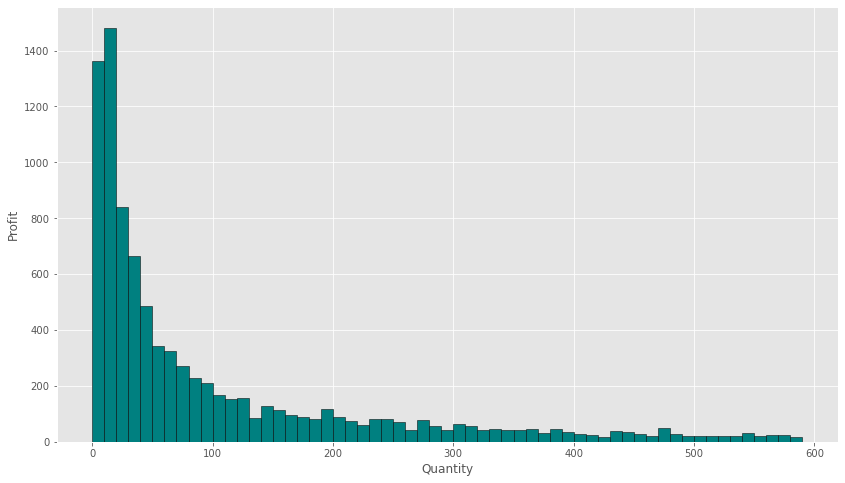

In [168]:
plt.hist(data["Sales"], bins=(np.arange(0,600,10)), color="teal", edgecolor="black")
plt.xlabel("Quantity")
plt.ylabel("Profit")

Text(0, 0.5, 'Profit')

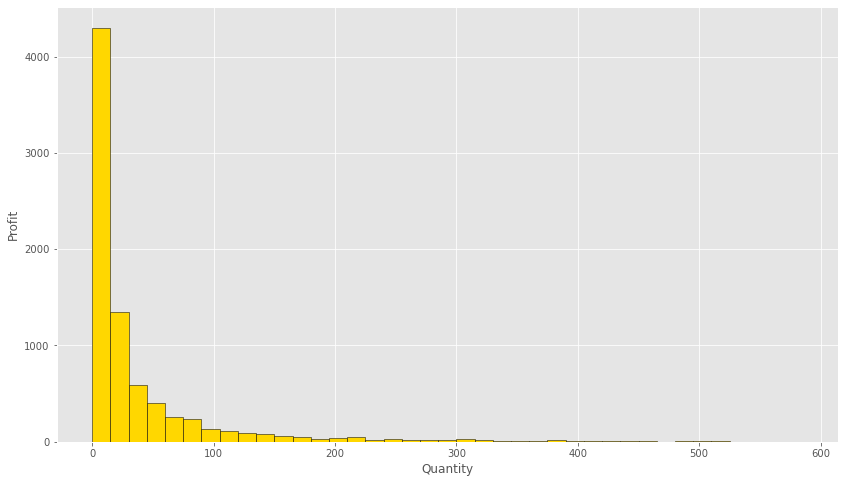

In [170]:
plt.hist(data["Profit"], bins=(np.arange(0,600,15)), color="gold", edgecolor="black")
plt.xlabel("Quantity")
plt.ylabel("Profit")

# Thank You